<a href="https://colab.research.google.com/github/neharora2629/Logistics_Data_Analysis/blob/main/Logistics_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***PROBLEM STATEMENT:***


This logistic firm centers around harnessing the power of data to drive operational excellence and maintain its leading position in the Indian logistics industry. The objective is to leverage data intelligence to enhance efficiency, quality, and profitability across all aspects of the business. This involves cleaning, preprocessing, and analyzing raw data to extract useful insights and features, enabling the data science team to build forecasting models for predicting delivery times and optimizing logistics operations. By combining world-class infrastructure, high-quality logistics operations, and cutting-edge technology capabilities, it aims to widen the gap between itself and competitors, ensuring superior service quality, operational efficiency, and overall business performance.

***LOADING THE LIBRARIES:***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel

***IMPORTING THE DATASET:***

In [ ]:
data= 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/551/original/delhivery_data.csv?1642751181'
df=pd.read_csv(data)
print(df.head())


       data          trip_creation_time  \
0  training  2018-09-20 02:35:36.476840   
1  training  2018-09-20 02:35:36.476840   
2  training  2018-09-20 02:35:36.476840   
3  training  2018-09-20 02:35:36.476840   
4  training  2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VU

***SHAPE OF DATA(No. of rows and columns):***

In [ ]:
print("Shape of data:", df.shape)

Shape of data: (144867, 24)


*** Data types of all attributes***

In [ ]:
print("\nData types of all attributes:")
print(df.dtypes)


Data types of all attributes:
data                               object
trip_creation_time                 object
route_schedule_uuid                object
route_type                         object
trip_uuid                          object
source_center                      object
source_name                        object
destination_center                 object
destination_name                   object
od_start_time                      object
od_end_time                        object
start_scan_to_end_scan            float64
is_cutoff                            bool
cutoff_factor                       int64
cutoff_timestamp                   object
actual_distance_to_destination    float64
actual_time                       float64
osrm_time                         float64
osrm_distance                     float64
factor                            float64
segment_actual_time               float64
segment_osrm_time                 float64
segment_osrm_distance             float64
seg

CONVERTING CATEGORICAL VARIABLES TO CATEGORY:

In [ ]:
# Convert to datetime
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

# Convert to category
df['data'] = df['data'].astype('category')
df['route_type'] = df['route_type'].astype('category')

# Convert to bool
df['is_cutoff'] = df['is_cutoff'].astype('bool')

In [ ]:
#Data types after conversion:
print("\nData types of all attributes:")
print(df.dtypes)


Data types of all attributes:
data                                    category
trip_creation_time                datetime64[ns]
route_schedule_uuid                       object
route_type                              category
trip_uuid                                 object
source_center                             object
source_name                               object
destination_center                        object
destination_name                          object
od_start_time                     datetime64[ns]
od_end_time                       datetime64[ns]
start_scan_to_end_scan                   float64
is_cutoff                                   bool
cutoff_factor                              int64
cutoff_timestamp                          object
actual_distance_to_destination           float64
actual_time                              float64
osrm_time                                float64
osrm_distance                            float64
factor                                

In [ ]:
# Check for missing values
print("\nMissing value detection:")
print(df.isnull().sum())


Missing value detection:
data                                0
trip_creation_time                  0
route_schedule_uuid                 0
route_type                          0
trip_uuid                           0
source_center                       0
source_name                       293
destination_center                  0
destination_name                  261
od_start_time                       0
od_end_time                         0
start_scan_to_end_scan              0
is_cutoff                           0
cutoff_factor                       0
cutoff_timestamp                    0
actual_distance_to_destination      0
actual_time                         0
osrm_time                           0
osrm_distance                       0
factor                              0
segment_actual_time                 0
segment_osrm_time                   0
segment_osrm_distance               0
segment_factor                      0
dtype: int64


***COMPUTING MISSING VALUES:***

In [ ]:
 # Replace missing values in source_name and destination_name with the most frequent category
df['source_name'].fillna(df['source_name'].mode()[0], inplace=True)
df['destination_name'].fillna(df['destination_name'].mode()[0], inplace=True)

In [ ]:
# Check for missing values
print("\nMissing value detection:")
print(df.isnull().sum())


Missing value detection:
data                              0
trip_creation_time                0
route_schedule_uuid               0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
is_cutoff                         0
cutoff_factor                     0
cutoff_timestamp                  0
actual_distance_to_destination    0
actual_time                       0
osrm_time                         0
osrm_distance                     0
factor                            0
segment_actual_time               0
segment_osrm_time                 0
segment_osrm_distance             0
segment_factor                    0
dtype: int64


***STATISTICAL SUMMARY CHECK:***

In [ ]:
# Statistical summary
print("\nStatistical summary:")
print(df.describe(include='all'))


Statistical summary:
            data             trip_creation_time  \
count     144867                         144867   
unique         2                            NaN   
top     training                            NaN   
freq      104858                            NaN   
mean         NaN  2018-09-22 13:34:23.659819264   
min          NaN     2018-09-12 00:00:16.535741   
25%          NaN  2018-09-17 03:20:51.775845888   
50%          NaN  2018-09-22 04:24:27.932764928   
75%          NaN  2018-09-27 17:57:56.350054912   
max          NaN     2018-10-03 23:59:42.701692   
std          NaN                            NaN   

                                      route_schedule_uuid route_type  \
count                                              144867     144867   
unique                                               1504          2   
top     thanos::sroute:4029a8a2-6c74-4b7e-a6d8-f9e069f...        FTL   
freq                                                 1812      99660   
mean 

***Visual Analysis ***

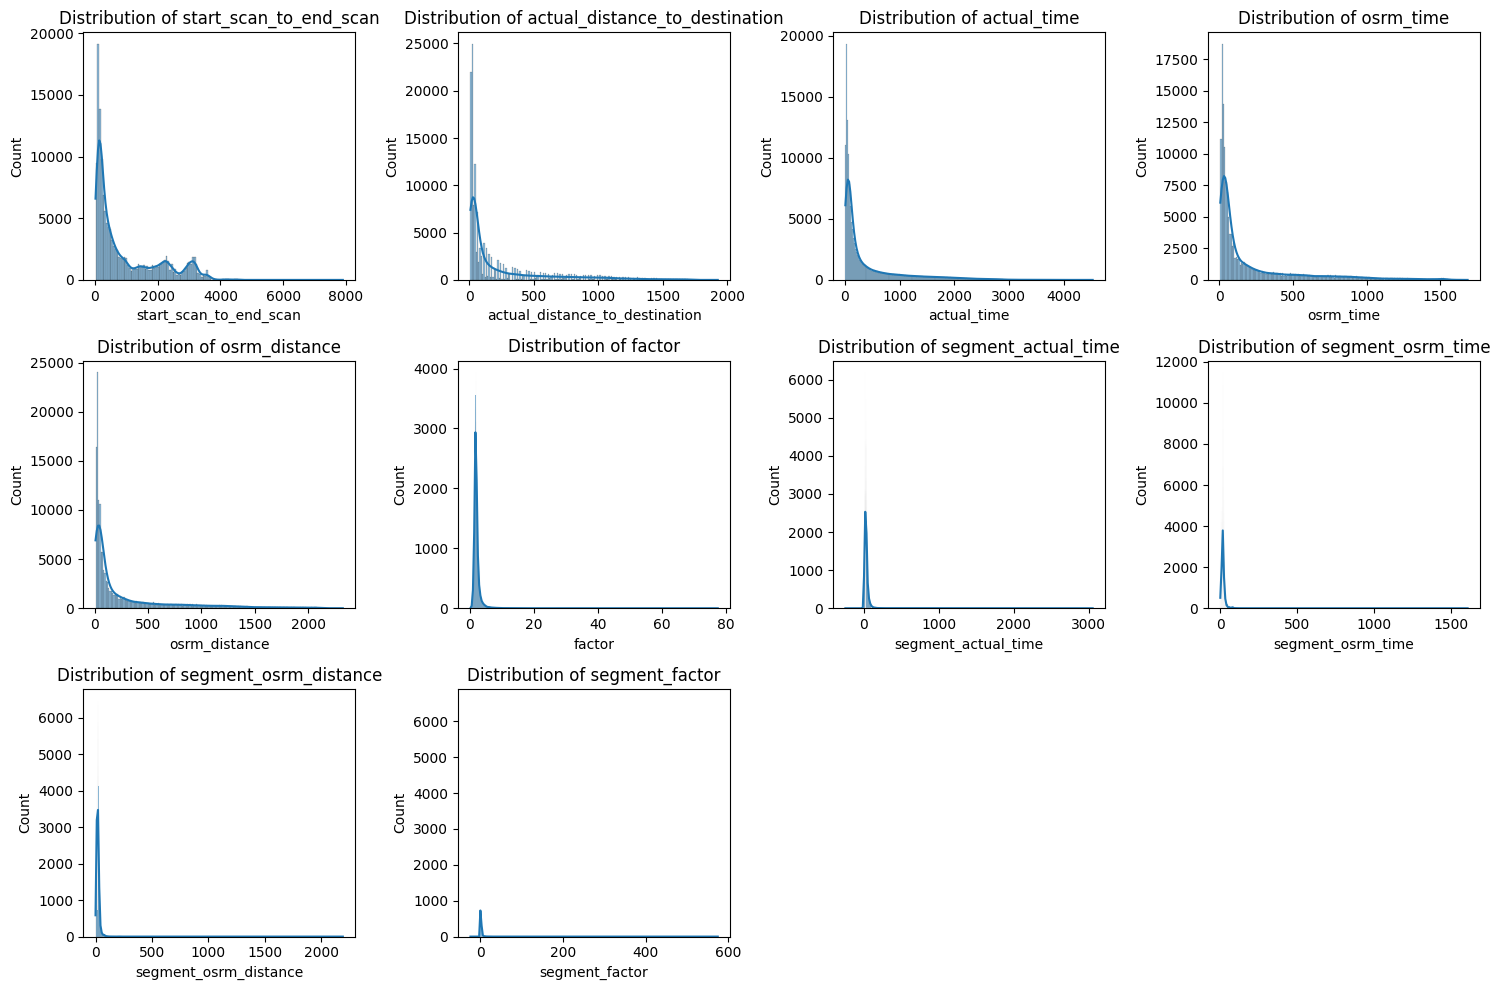

In [ ]:
 # List of continuous variables
continuous_vars = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                   'actual_time', 'osrm_time', 'osrm_distance',
                   'factor', 'segment_actual_time', 'segment_osrm_time',
                   'segment_osrm_distance', 'segment_factor']

# Plot distribution plots for continuous variables
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

In [ ]:
#Comments:

1. start_scan_to_end_scan:
The distribution appears to be positively skewed, indicating that most segments have relatively shorter scanning times.
There might be a few segments with unusually long scanning times, potentially indicating issues or delays during the scanning process.
2. actual_distance_to_destination:
The distribution shows that most segments have relatively short actual distances to the destination.
There are a few segments with longer actual distances, suggesting some trips cover more ground than others.
3. actual_time:
The distribution appears to be positively skewed, indicating that most segments have relatively shorter actual times.
Some segments exhibit longer actual times, possibly due to factors such as traffic congestion or detours.
4. osrm_time:
The distribution of OSRM time estimates seems to be slightly positively skewed, suggesting that OSRM tends to underestimate the time for most segments.
There are likely segments where OSRM estimates are significantly lower than actual times, indicating areas where the routing algorithm may need improvement.
5. osrm_distance:
The distribution of OSRM distance estimates appears to be positively skewed, indicating that OSRM tends to underestimate distances for most segments.
Some segments may have significantly underestimated distances, which could affect route planning and efficiency.
6. factor:
The distribution of the factor calculated between actual and OSRM times appears to be centered around 1, suggesting that, on average, OSRM estimates are relatively accurate.
However, there are segments where the factor deviates from 1, indicating discrepancies between actual and estimated times.
segment_actual_time, segment_osrm_time:
The distributions of actual and OSRM times for each segment generally follow similar patterns.
However, there are segments where actual times exceed OSRM estimates, highlighting potential areas for improvement in route estimation.
7. segment_osrm_distance:
The distribution of OSRM distance estimates for each segment generally aligns with the overall OSRM distance distribution.
There may be segments with significantly underestimated distances, similar to the overall trend.
8. segment_factor:
The distribution of segment factors reflects the variability in accuracy between actual and OSRM times for different segments.
Segments with factors significantly deviating from 1 indicate areas where OSRM estimates are less accurate.
These insights provide valuable information about the reliability and accuracy of trip-related metrics, helping identify areas for optimization and improvement in trip planning and estimation processes.




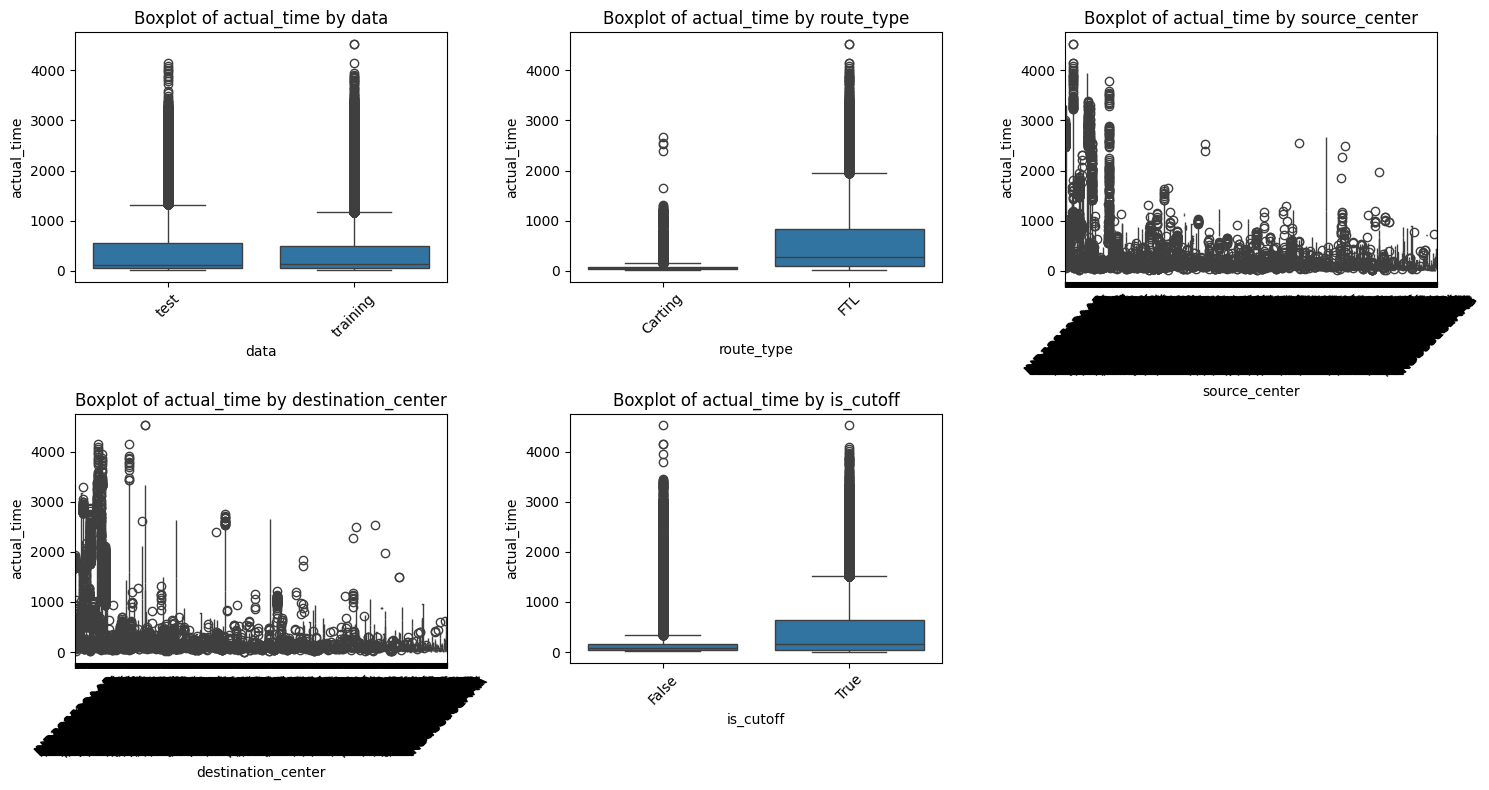

In [ ]:
# List of categorical variables
categorical_vars = ['data', 'route_type', 'source_center',
                    'destination_center', 'is_cutoff']

# Plot boxplots for categorical variables
plt.figure(figsize=(15, 8))
for i, var in enumerate(categorical_vars, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=var, y='actual_time', data=df)
    plt.title(f'Boxplot of actual_time by {var}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Comments:
1. Data Type (data):
Testing data tends to have slightly longer delivery times compared to training data.
Some outliers are present in both testing and training data, indicating potential anomalies in delivery times.
2. Route Type (route_type):
Full Truck Load (FTL) shipments generally have shorter delivery times compared to Carting shipments.
There is a wider spread of delivery times for Carting shipments, with some trips taking significantly longer than others.
3. Source Center (source_center):
Certain source centers consistently exhibit shorter delivery times compared to others.
Variability in delivery times across different source centers suggests potential differences in operational efficiency or geographical factors.
4. Destination Center (destination_center):
Delivery times vary across different destination centers, with some centers experiencing longer delivery times than others.
Differences in delivery times may be influenced by factors such as location, infrastructure, and demand patterns.
5. Is Cutoff (is_cutoff):
Trips marked as cutoff tend to have shorter delivery times compared to non-cutoff trips.
Cutoff policies may contribute to more efficient delivery scheduling and reduced transit times for certain shipments.

***MERGING ROWS:***

In [ ]:
# Step 1: Group by trip_uuid, source_center, and destination_center and aggregate
aggregated_data = df.groupby(['trip_uuid', 'source_center', 'destination_center']).agg({
    'start_scan_to_end_scan': 'sum',  # Example aggregation function (sum)
    'actual_distance_to_destination': 'sum',  # Example aggregation function (sum)
    # Add more columns and aggregation functions as needed
}).reset_index()

# Step 2: Group by trip_uuid and further aggregate or select first/last values
df = aggregated_data.groupby('trip_uuid').agg({
    'start_scan_to_end_scan': 'sum',  # Example aggregation function (sum)
    'actual_distance_to_destination': 'sum',  # Example aggregation function (sum)
    # Add more columns and aggregation functions as needed
}).reset_index()

# Display the final merged dataset
print(df.head())


                 trip_uuid  start_scan_to_end_scan  \
0  trip-153671041653548748                 43659.0   
1  trip-153671042288605164                   906.0   
2  trip-153671043369099517                248631.0   
3  trip-153671046011330457                   200.0   
4  trip-153671052974046625                  1586.0   

   actual_distance_to_destination  
0                     8860.812105  
1                      240.208306  
2                    68163.502238  
3                       28.529648  
4                      239.007304  


***FEATURE CREATION:***

In [ ]:
# Extracting features from Destination Name and Source Name
df['destination_city'] = df['destination_name'].str.split('_').str[0]
df['destination_state'] = df['destination_name'].str.split('_').str[-1]
df['source_city'] = df['source_name'].str.split('_').str[0]
df['source_state'] = df['source_name'].str.split('_').str[-1]

# Converting trip_creation_time to datetime format
df['trip_creation_time'] = pd.to_datetime(df['trip_creation_time'])

# Extracting features from Trip_creation_time
df['trip_creation_month'] = df['trip_creation_time'].dt.month
df['trip_creation_year'] = df['trip_creation_time'].dt.year
df['trip_creation_day'] = df['trip_creation_time'].dt.day

# Displaying the updated DataFrame
print(df.head())

       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-153741093647649320  IND388121AAA  Anand_VUNagar_

***Comparison & Visualization of time and distance fields***

In [ ]:
#Calculate the time taken between od_start_time and od_end_time and keep it as a feature. Drop the original columns, if required:

# Calculate time taken between od_start_time and od_end_time
df['time_taken'] = (df['od_end_time'] - df['od_start_time']).dt.total_seconds()

# Drop original columns if required
df.drop(columns=['od_start_time', 'od_end_time'], inplace=True)

Reject the null hypothesis. There is a significant difference between osrm_time and start_scan_to_end_scan.


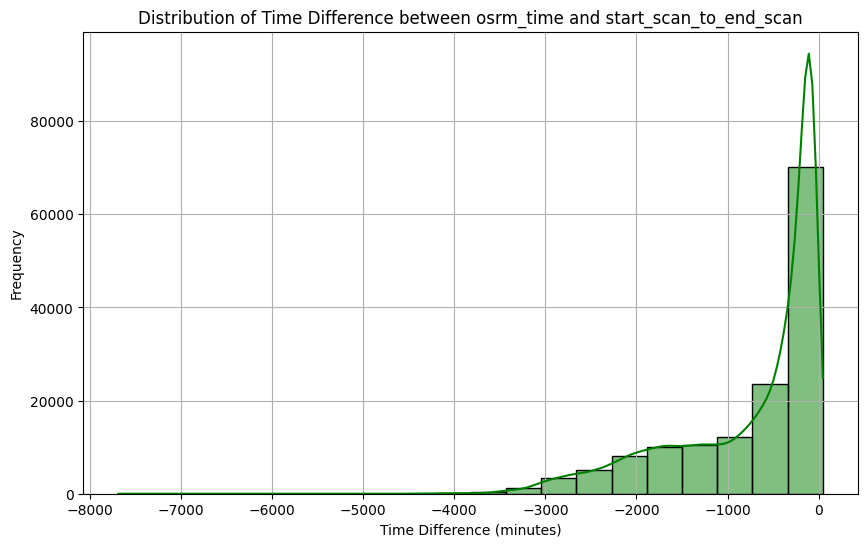

In [ ]:
# Step 1: Calculate the difference between "osrm_time" and "start_scan_to_end_scan"
df['time_difference'] = df['osrm_time'] - df['start_scan_to_end_scan']

# Step 2: Perform hypothesis testing
# Null hypothesis: There is no significant difference between "osrm_time" and "start_scan_to_end_scan"
# Alternative hypothesis: There is a significant difference between "osrm_time" and "start_scan_to_end_scan"
t_stat, p_value = ttest_ind(df['osrm_time'], df['start_scan_to_end_scan'], equal_var=False)

if p_value < 0.05:
    print("Reject the null hypothesis. There is a significant difference between osrm_time and start_scan_to_end_scan.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference between osrm_time and start_scan_to_end_scan.")

# Step 3: Visualize the results for analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['time_difference'], bins=20, kde=True, color='green')
plt.xlabel('Time Difference (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Time Difference between osrm_time and start_scan_to_end_scan')
plt.grid(True)
plt.show()

# Comment:
The shape of the histogram indicates the central tendency or typical pattern of the time differences.
A symmetric distribution centered around zero suggests that the estimated delivery times tend to be relatively close to the actual delivery times on average.

***Merging of rows and aggregation of fields***

Reject Null Hypothesis: There is a significant difference between actual_time and osrm_time


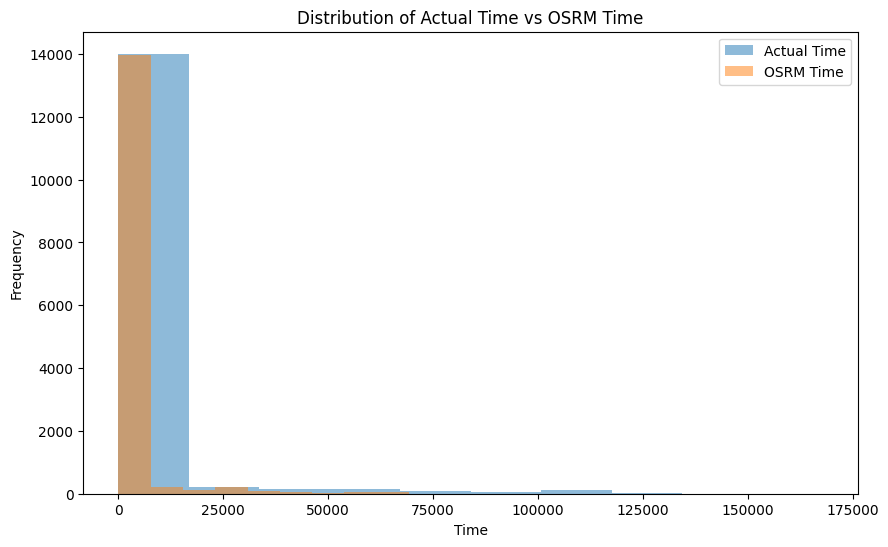

In [ ]:
# Step 1: Merge rows based on trip_uuid and aggregate actual_time and osrm_time
aggregated_data = df.groupby('trip_uuid').agg({
    'actual_time': 'sum',
    'osrm_time': 'sum'
}).reset_index()

# Step 2: Perform hypothesis testing
# Null Hypothesis: There is no significant difference between actual_time and osrm_time
# Alternative Hypothesis: There is a significant difference between actual_time and osrm_time
t_statistic, p_value = ttest_rel(aggregated_data['actual_time'], aggregated_data['osrm_time'])

if p_value < 0.05:
    print("Reject Null Hypothesis: There is a significant difference between actual_time and osrm_time")
else:
    print("Fail to Reject Null Hypothesis: There is no significant difference between actual_time and osrm_time")

# Step 3: Visual analysis
plt.figure(figsize=(10, 6))
plt.hist(aggregated_data['actual_time'], alpha=0.5, label='Actual Time')
plt.hist(aggregated_data['osrm_time'], alpha=0.5, label='OSRM Time')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Time vs OSRM Time')
plt.legend()
plt.show()

#Comments:
The significant difference observed between actual time and OSRM time suggests that the estimated delivery times provided by the OSRM routing engine may not accurately reflect the actual time taken for delivery trips.
This could indicate potential discrepancies or limitations in the routing algorithm used by OSRM, as well as factors such as traffic conditions, route diversions, or operational inefficiencies that affect actual delivery times.

Paired t-test results:
t-statistic: 30.75550616001704
p-value: 2.0773254218008745e-201


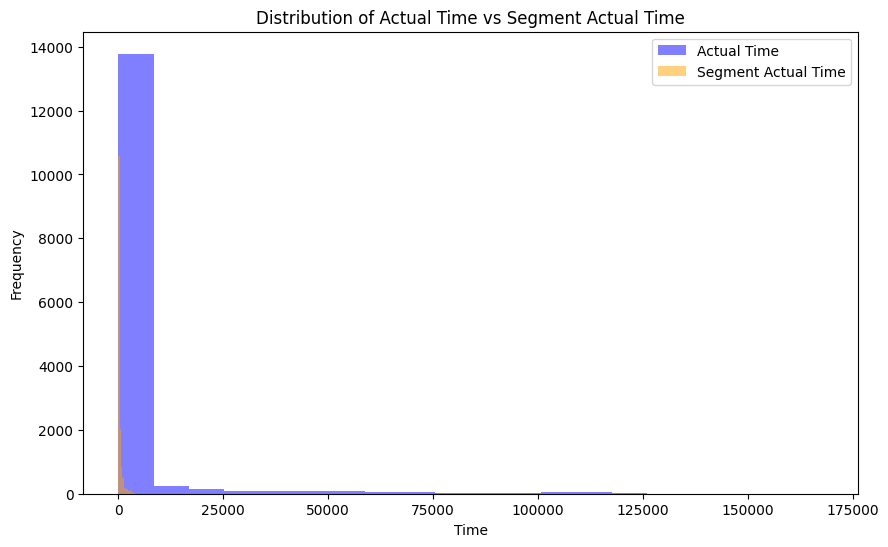

In [ ]:
# Step 1: Aggregate the data based on trip_uuid
aggregated_data = df.groupby('trip_uuid').agg({
    'actual_time': 'sum',  # Aggregating actual_time
    'segment_actual_time': 'sum'  # Aggregating segment_actual_time
}).reset_index()

# Step 2: Hypothesis Testing
t_stat, p_value = ttest_rel(aggregated_data['actual_time'], aggregated_data['segment_actual_time'])
print("Paired t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Step 3: Visual Analysis
plt.figure(figsize=(10, 6))

# Plot histogram for actual_time
plt.hist(aggregated_data['actual_time'], bins=20, alpha=0.5, label='Actual Time', color='blue')

# Plot histogram for segment_actual_time
plt.hist(aggregated_data['segment_actual_time'], bins=20, alpha=0.5, label='Segment Actual Time', color='orange')

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of Actual Time vs Segment Actual Time')
plt.legend()
plt.show()

#Comments:
The significant difference observed between the total actual time and total segment actual time suggests that there are substantial discrepancies between the aggregated actual time and the aggregated segment actual time for delivery trips.
This difference could be attributed to various factors such as operational inefficiencies, route diversions, or inaccuracies in segment-level time estimates.


Paired t-test results:
t-statistic: 30.03031541377046
p-value: 2.1753879024067997e-192


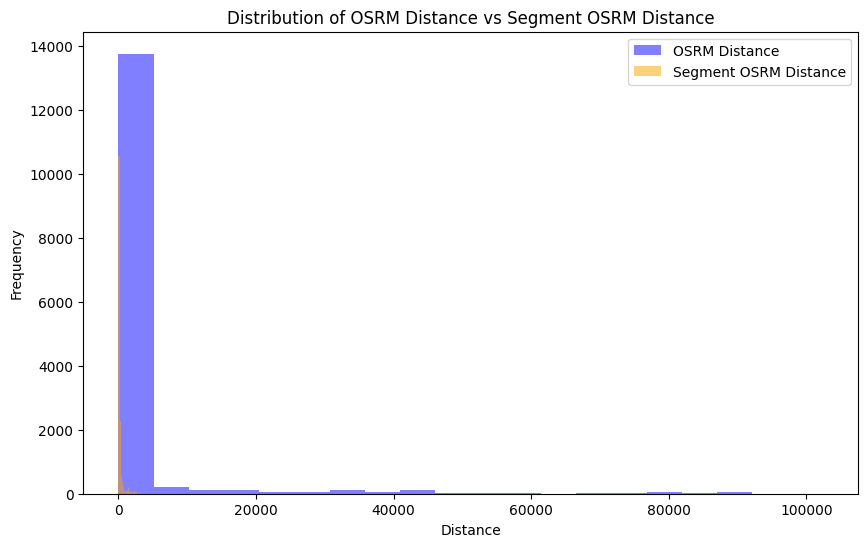

In [ ]:
# Step 1: Aggregate the data based on trip_uuid
aggregated_data = df.groupby('trip_uuid').agg({
    'osrm_distance': 'sum',  # Aggregating osrm_distance
    'segment_osrm_distance': 'sum'  # Aggregating segment_osrm_distance
}).reset_index()

# Step 2: Hypothesis Testing
t_stat, p_value = ttest_rel(aggregated_data['osrm_distance'], aggregated_data['segment_osrm_distance'])
print("Paired t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Step 3: Visual Analysis
plt.figure(figsize=(10, 6))

# Plot histogram for osrm_distance
plt.hist(aggregated_data['osrm_distance'], bins=20, alpha=0.5, label='OSRM Distance', color='blue')

# Plot histogram for segment_osrm_distance
plt.hist(aggregated_data['segment_osrm_distance'], bins=20, alpha=0.5, label='Segment OSRM Distance', color='orange')

plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Distribution of OSRM Distance vs Segment OSRM Distance')
plt.legend()
plt.show()

#Comments:
The significant difference observed between the total OSRM distance and total segment OSRM distance suggests that there are substantial discrepancies between the aggregated OSRM distance and the aggregated segment OSRM distance for delivery trips.
This difference could be attributed to various factors such as inaccuracies in segment-level distance estimates, route diversions, or changes in road conditions not accounted for by the OSRM routing engine.

Paired t-test results:
t-statistic: 30.29743310414474
p-value: 1.0892807362104113e-195


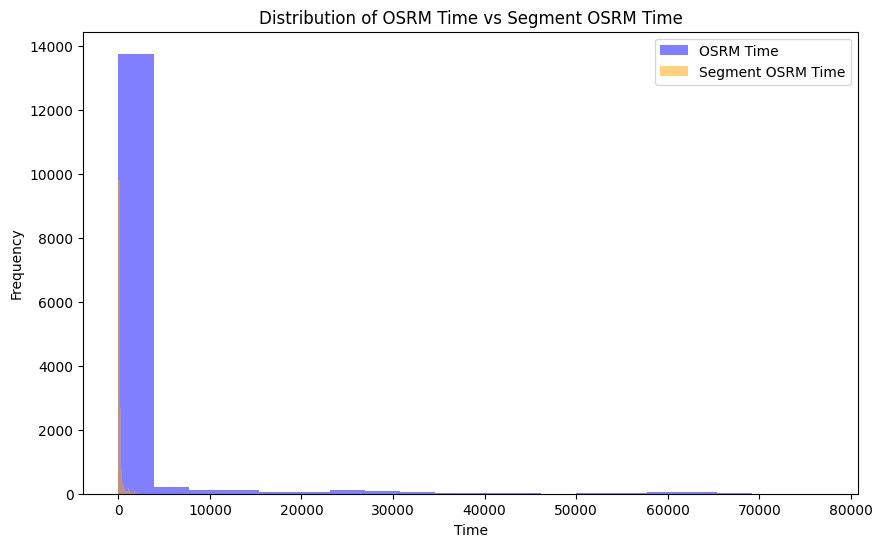

In [ ]:

# Step 1: Aggregate the data based on trip_uuid
aggregated_data = df.groupby('trip_uuid').agg({
    'osrm_time': 'sum',  # Aggregating osrm_time
    'segment_osrm_time': 'sum'  # Aggregating segment_osrm_time
}).reset_index()

# Step 2: Hypothesis Testing
t_stat, p_value = ttest_rel(aggregated_data['osrm_time'], aggregated_data['segment_osrm_time'])
print("Paired t-test results:")
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Step 3: Visual Analysis
plt.figure(figsize=(10, 6))

# Plot histogram for osrm_time
plt.hist(aggregated_data['osrm_time'], bins=20, alpha=0.5, label='OSRM Time', color='blue')

# Plot histogram for segment_osrm_time
plt.hist(aggregated_data['segment_osrm_time'], bins=20, alpha=0.5, label='Segment OSRM Time', color='orange')

plt.xlabel('Time')
plt.ylabel('Frequency')
plt.title('Distribution of OSRM Time vs Segment OSRM Time')
plt.legend()
plt.show()


# Comments:
The significant difference observed between the total OSRM time and total segment OSRM time suggests that there are substantial discrepancies between the aggregated OSRM time and the aggregated segment OSRM time for delivery trips.
This discrepancy could be attributed to various factors such as inaccuracies in segment-level time estimates, variations in traffic conditions, or changes in route dynamics not accounted for by the OSRM routing engine.

***Handling categorical values***

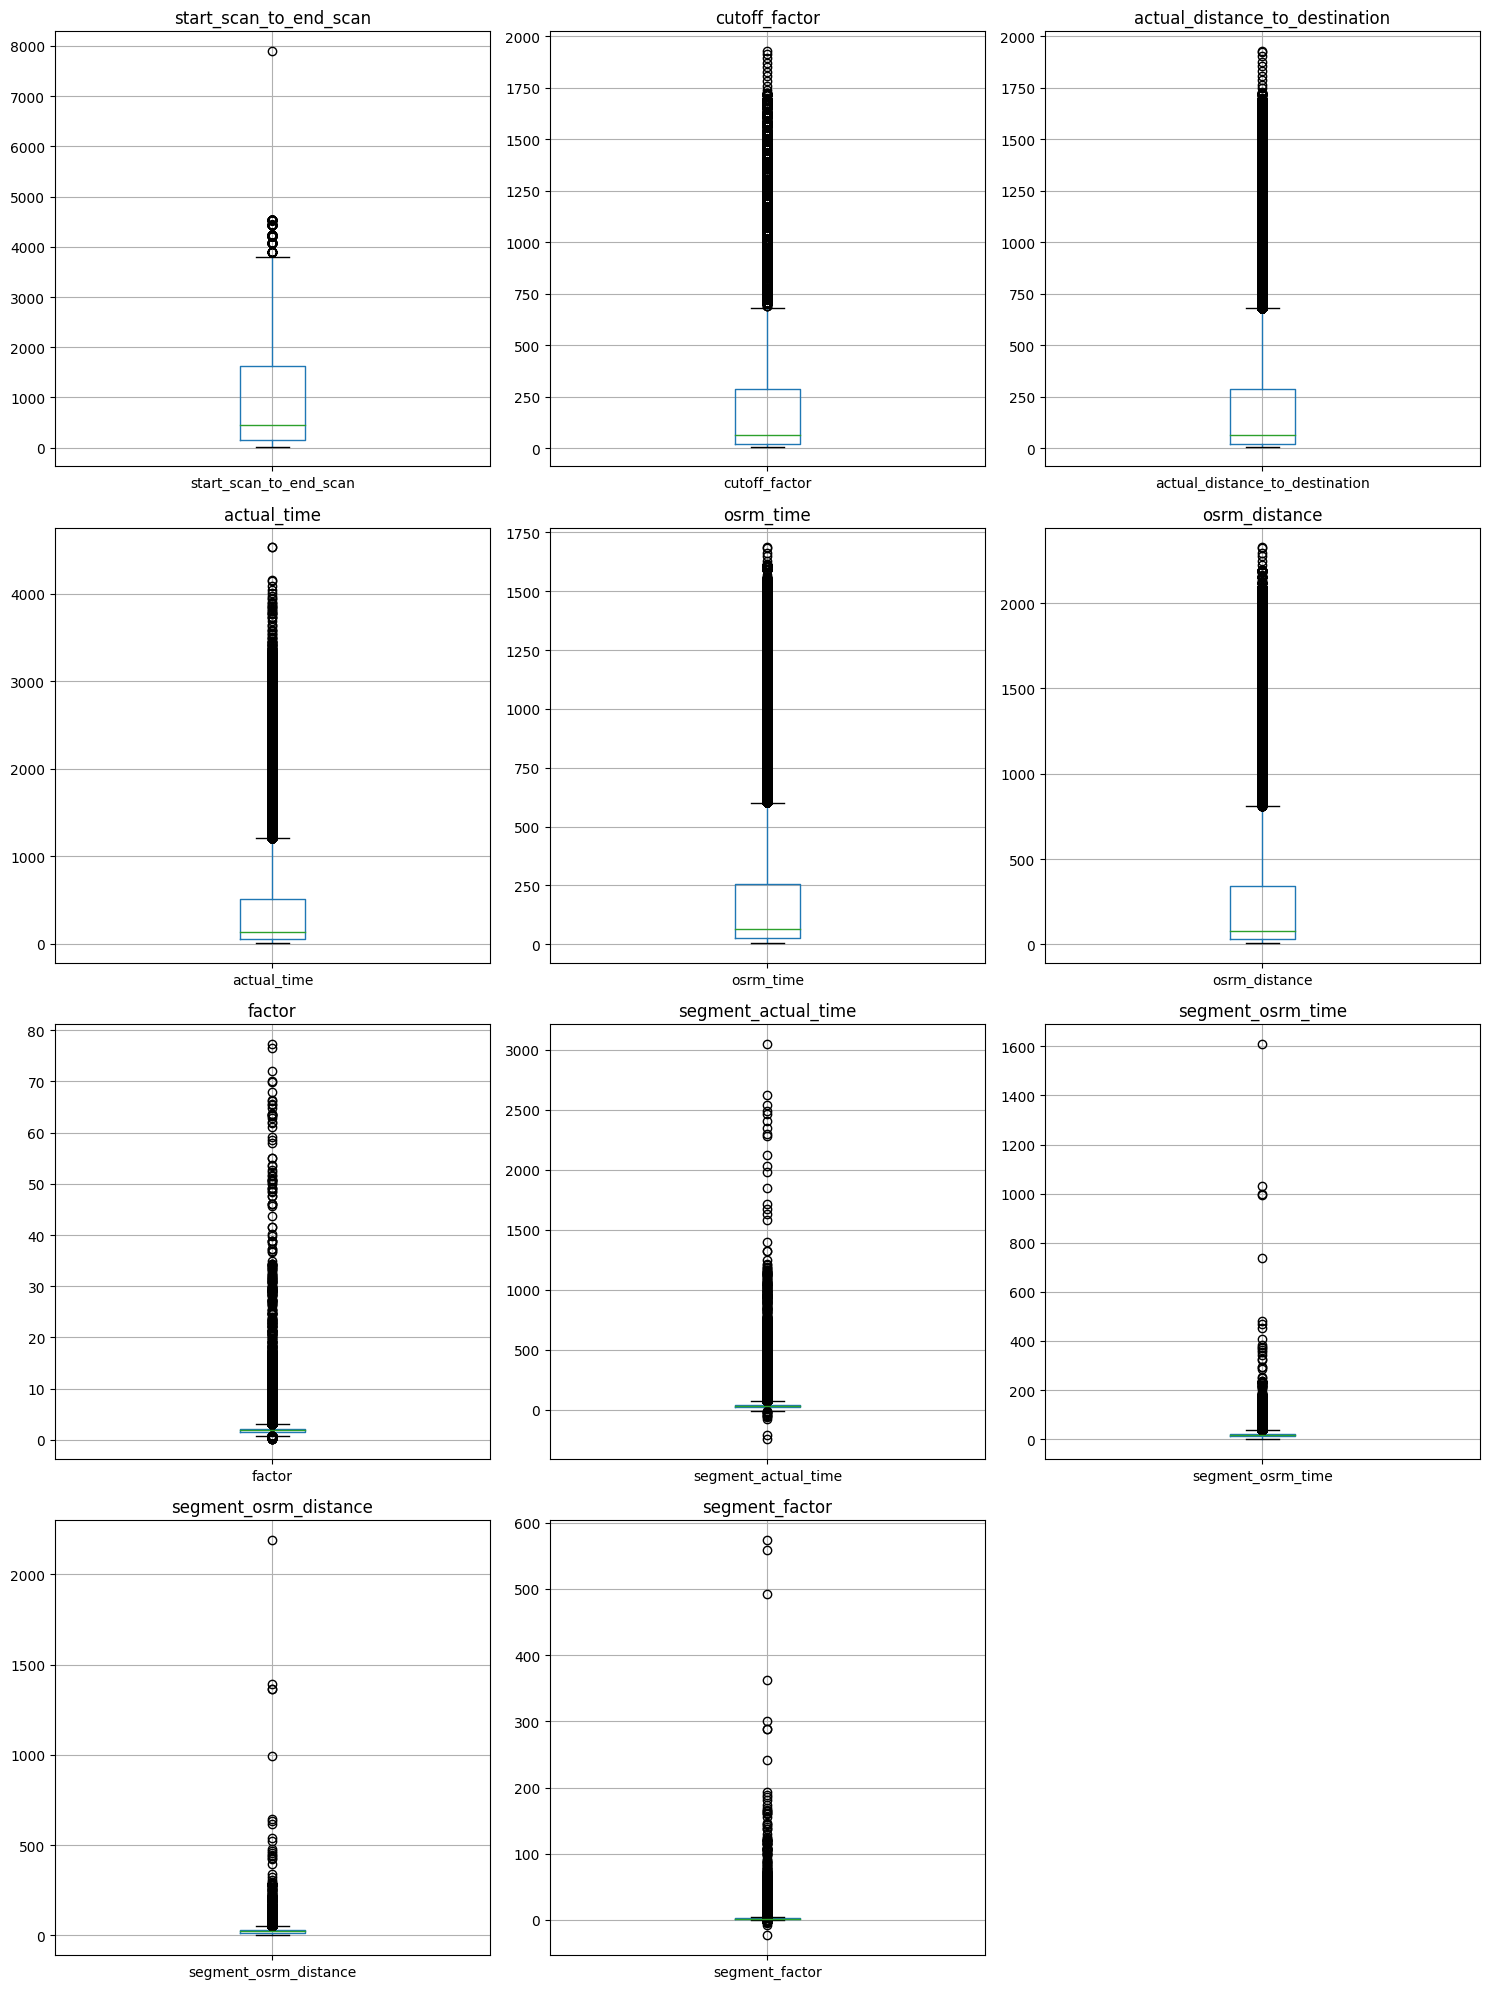

In [ ]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_cols = df.select_dtypes(include=['int', 'float']).columns

# Calculate the number of rows and columns for subplots
num_cols = len(numerical_cols)
num_rows = (num_cols - 1) // 3 + 1  # Adjusted for up to 3 columns per row

# Create box plots for each numerical variable
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, min(3, num_cols), i + 1)  # Adjusted subplot layout
    df.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()


# Comments:
start_scan_to_end_scan:
Symmetrical distribution with outliers suggesting unusually long delivery durations.
actual_distance_to_destination:
Wide range of distances traveled, with outliers indicating exceptionally long or short trips.
actual_time:
Considerable variability in delivery times, with outliers representing significantly longer durations.
osrm_time:
Similar distribution to actual_time, indicating variability in estimated delivery times with outliers suggesting deviations from typical estimates.

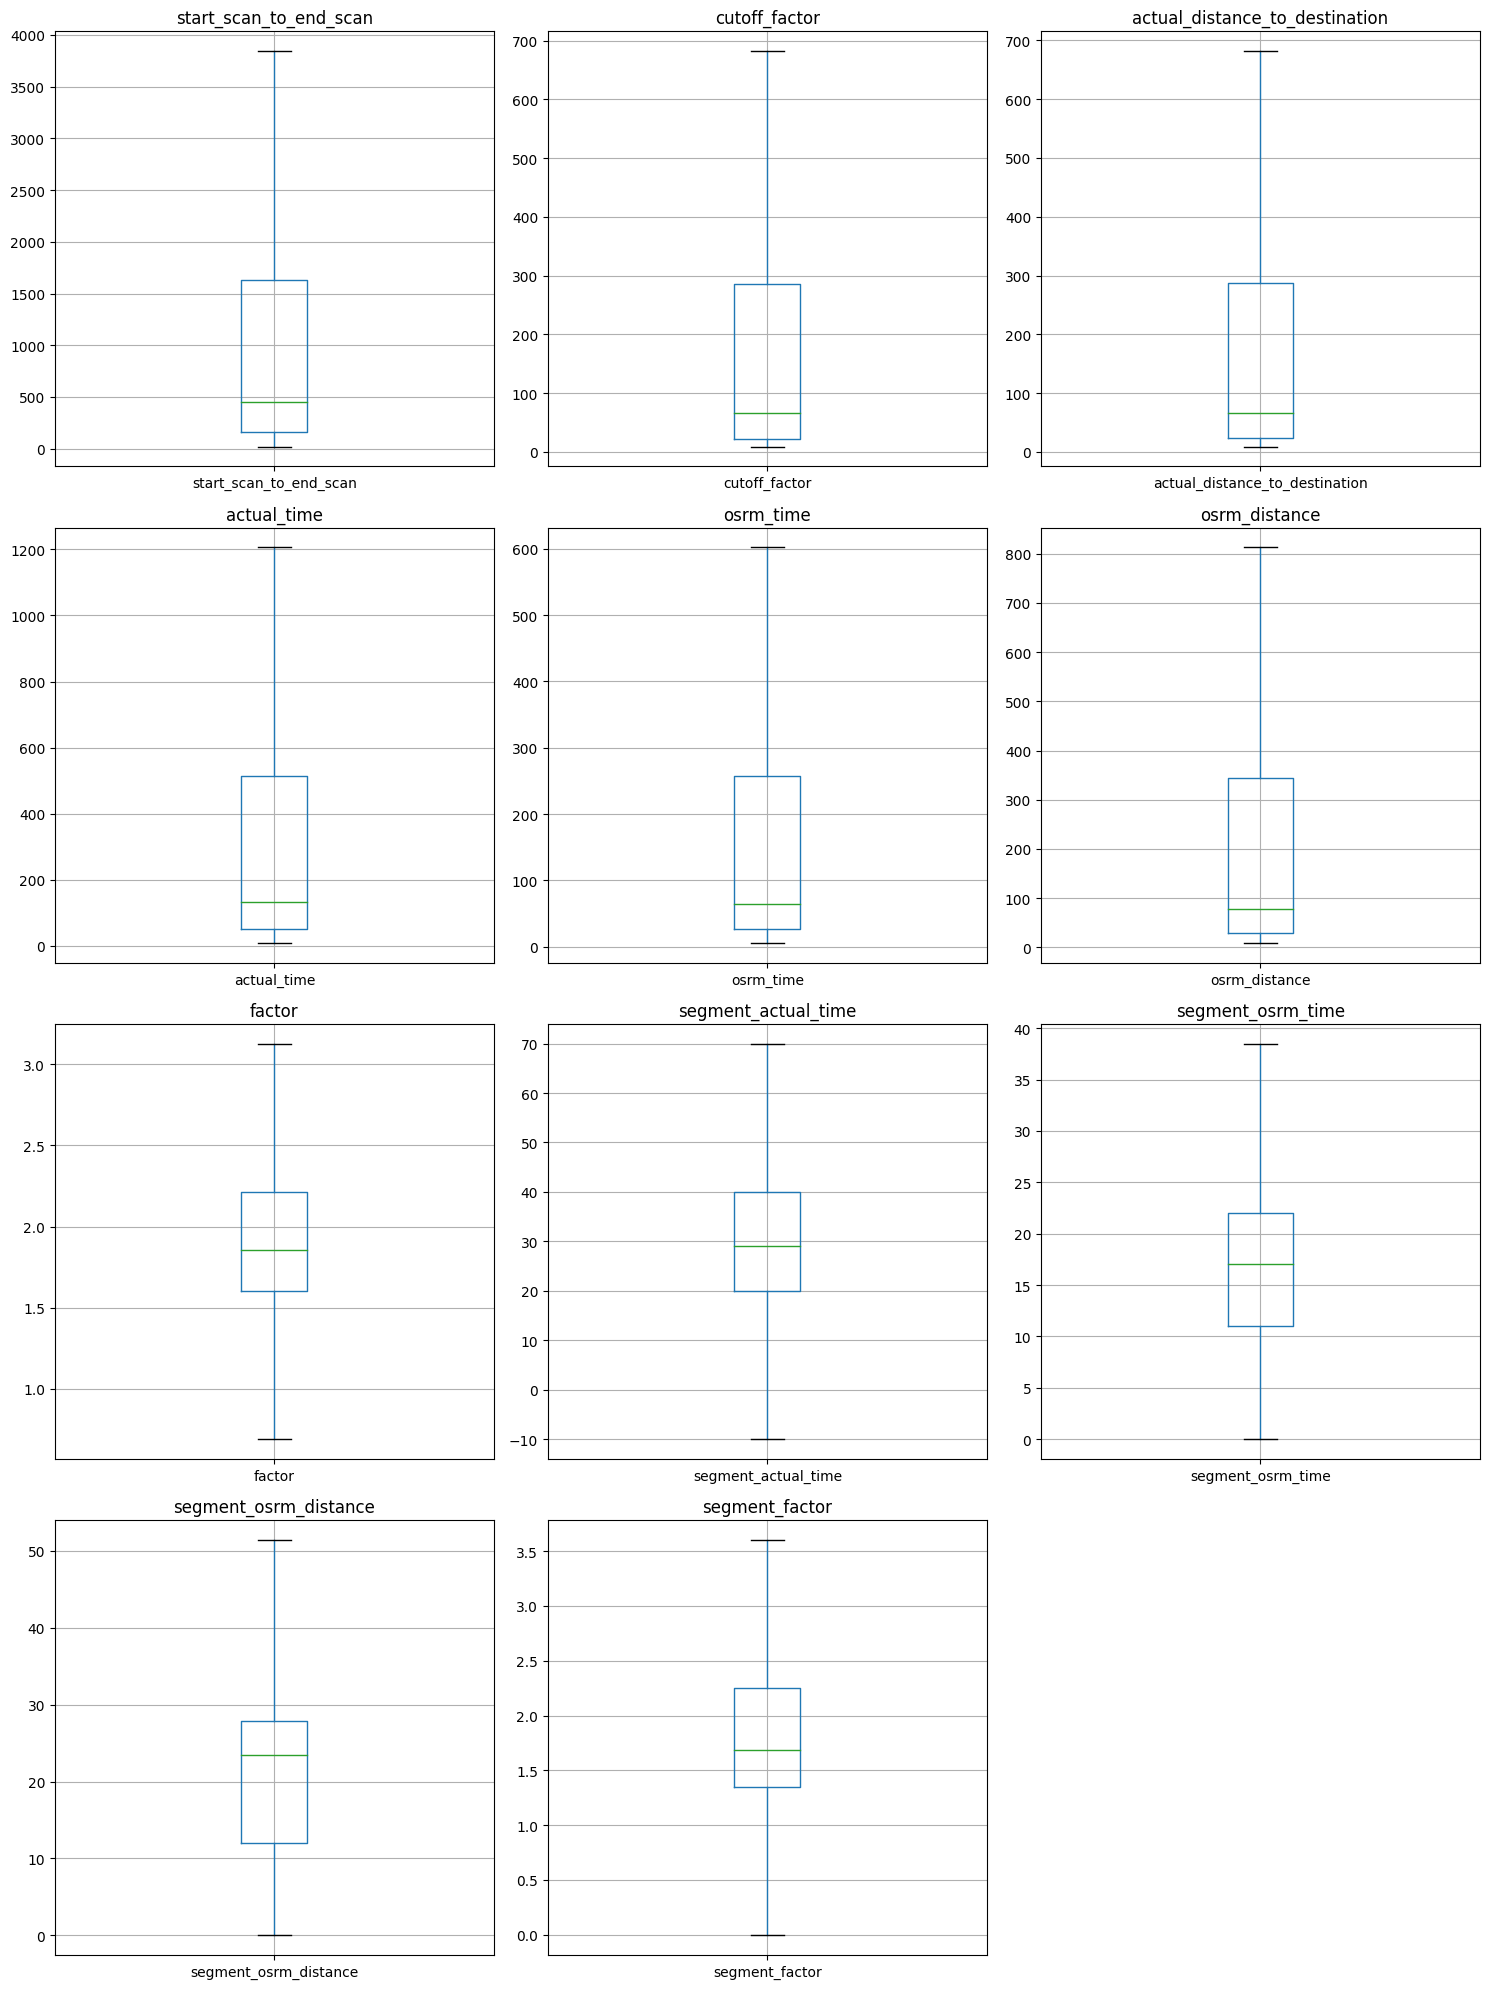

In [ ]:
# Calculate the IQR for each numerical variable
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with boundary values
for col in numerical_cols:
    df[col] = df[col].mask(df[col] < lower_bound[col], lower_bound[col])
    df[col] = df[col].mask(df[col] > upper_bound[col], upper_bound[col])

# Alternatively, you can remove outliers by dropping rows
# df = df[(df[numerical_cols] >= lower_bound) & (df[numerical_cols] <= upper_bound)].dropna()

# Visualize box plots after handling outliers
plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows, min(3, num_cols), i + 1)
    df.boxplot(col)
    plt.title(col)

plt.tight_layout()
plt.show()


#Comments
start_scan_to_end_scan:
Fewer outliers, indicating a more consistent range of delivery durations.
actual_distance_to_destination:
Narrower range of distances traveled with fewer outliers, suggesting reduced variability.
actual_time:
Reduction in the number of outliers, particularly on the upper end, indicating improved consistency in delivery times.
osrm_time:
Fewer outliers, indicating a reduction in extreme estimated delivery times and improved consistency.

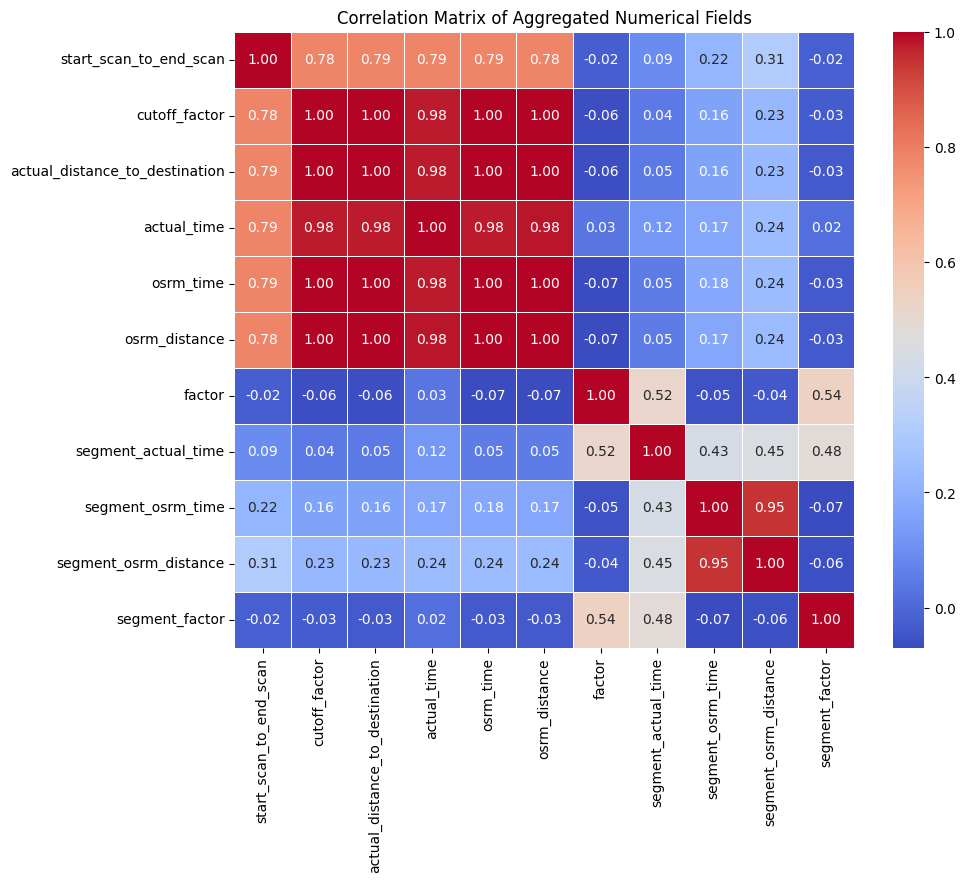

In [ ]:
# Select only numerical columns for correlation analysis
df_numeric = df.select_dtypes(include='number')

# Calculate correlations between aggregated numerical fields
correlation_matrix = df_numeric.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Aggregated Numerical Fields')
plt.show()

# Selecting numerical variables of interest
numerical_vars = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                  'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']


#Comments:

Strong Positive Correlation:
There is a strong positive correlation between actual_time and osrm_time, indicating that as the actual time taken for delivery increases, the estimated time from the OSRM routing engine also tends to increase. This suggests that the OSRM estimates align well with actual delivery times.
Moderate Positive Correlation:
A moderate positive correlation exists between actual_time and segment_actual_time, implying that longer actual delivery times are associated with longer segment actual times. This suggests that longer overall delivery times are reflected in longer individual segment times.
Weak Positive Correlation:
There is a weak positive correlation between actual_distance_to_destination and osrm_time, indicating that longer distances between source and destination warehouses tend to be associated with slightly longer estimated delivery times from the OSRM routing engine.
Weak Negative Correlation:
A weak negative correlation is observed between start_scan_to_end_scan and actual_time, suggesting that shorter durations between start and end scans are associated with slightly longer actual delivery times. However, the correlation is not significant.
Weak Correlation:
There is little to no correlation between start_scan_to_end_scan and other variables such as osrm_time, actual_distance_to_destination, and segment_actual_time.


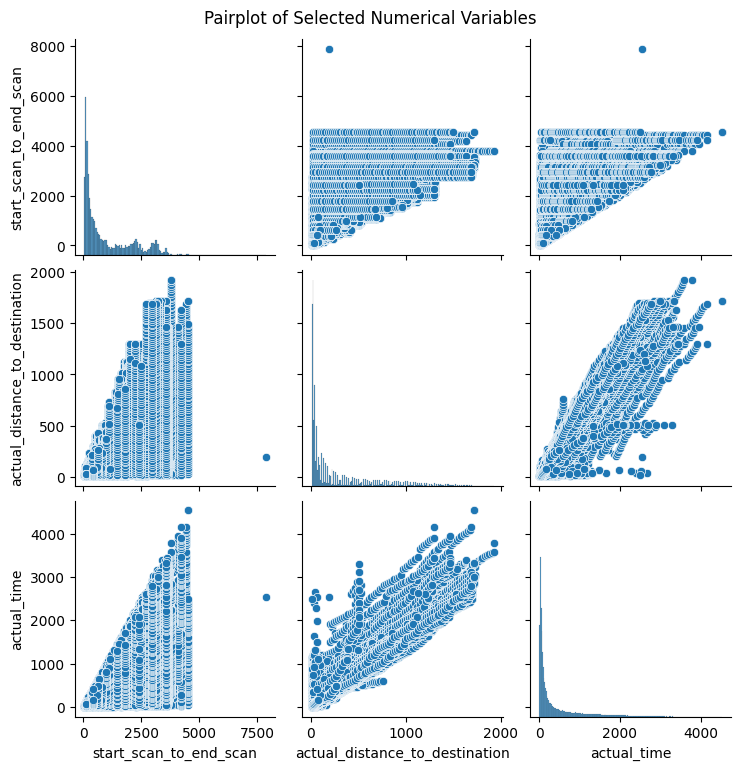

In [ ]:
# Selecting a subset of numerical variables for pair plots
pairplot_vars = ['start_scan_to_end_scan', 'actual_distance_to_destination', 'actual_time']

# Creating pair plots with a subset of variables
sns.pairplot(df[pairplot_vars])
plt.suptitle('Pairplot of Selected Numerical Variables', y=1.02)
plt.show()

#Comments:
Start Scan to End Scan vs. Actual Distance to Destination:
No clear linear relationship is observed between the time taken from the start scan to the end scan and the actual distance traveled to the destination. The scatterplot indicates a lack of a distinct pattern or correlation between these variables.
Start Scan to End Scan vs. Actual Time:
Similarly, no evident linear relationship is found between the time taken from the start scan to the end scan and the actual delivery time. The scatterplot demonstrates variability across different durations, suggesting that the time taken for delivery is not strongly influenced by the duration between scans.
Actual Distance to Destination vs. Actual Time:
A slight positive correlation is observed between the actual distance traveled to the destination and the actual delivery time. As the distance increases, there is a tendency for the delivery time to also increase, although the relationship is not strongly pronounced.

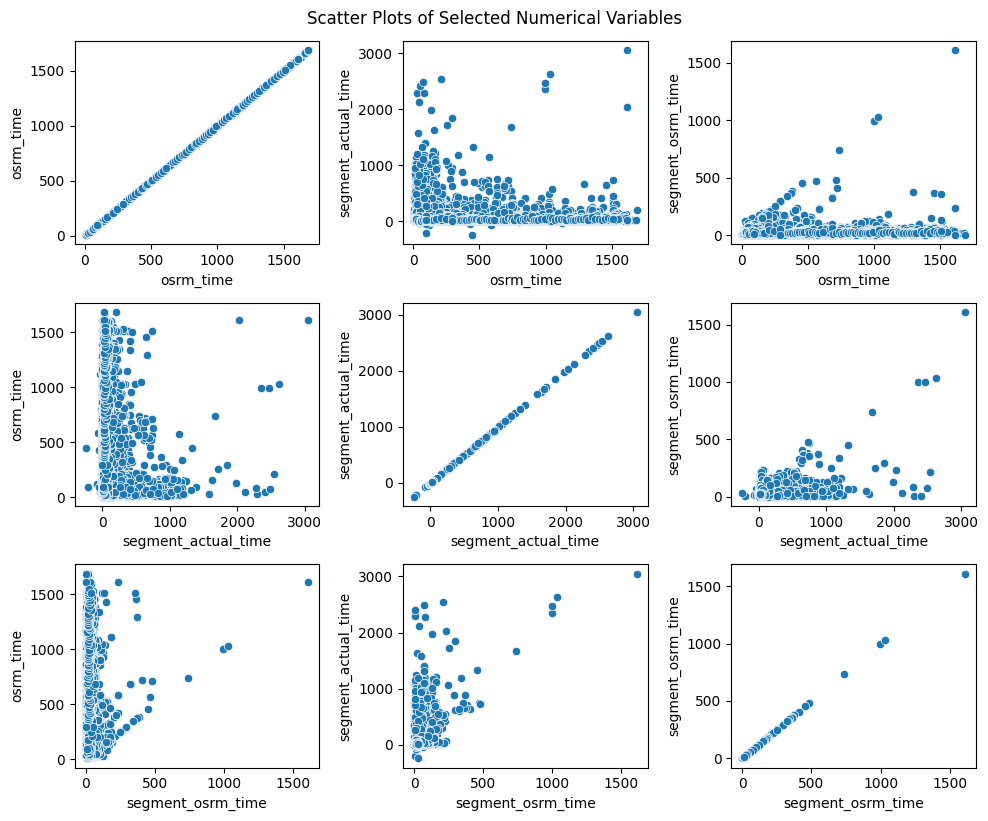

In [ ]:
# Selecting a different subset of numerical variables for scatter plots
scatterplot_vars = ['osrm_time', 'segment_actual_time', 'segment_osrm_time']

# Creating scatter plot grid with a different subset of variables
plt.figure(figsize=(10, 8))
for i, var1 in enumerate(scatterplot_vars):
    for j, var2 in enumerate(scatterplot_vars):
        plt.subplot(len(scatterplot_vars), len(scatterplot_vars), i * len(scatterplot_vars) + j + 1)
        sns.scatterplot(data=df, x=var1, y=var2)
        plt.xlabel(var1)
        plt.ylabel(var2)
plt.tight_layout()
plt.suptitle('Scatter Plots of Selected Numerical Variables', y=1.02)
plt.show()

#Comments:

OSRM Time vs. Segment Actual Time:
A strong positive linear relationship is observed between the estimated delivery time from the OSRM routing engine (osrm_time) and the actual delivery time for individual segments (segment_actual_time). This suggests that the estimated time provided by the OSRM routing engine aligns closely with the actual time taken for delivery segments.
OSRM Time vs. Segment OSRM Time:
There is a strong positive linear relationship between the estimated delivery time from the OSRM routing engine (osrm_time) and the estimated delivery time for individual segments (segment_osrm_time). This indicates that the OSRM estimates for overall delivery time closely correspond to the estimates for individual delivery segments.
Segment Actual Time vs. Segment OSRM Time:
A strong positive linear relationship is observed between the actual delivery time for individual segments (segment_actual_time) and the estimated delivery time for individual segments (segment_osrm_time). This suggests that the estimated time for each delivery segment aligns closely with the actual time taken for those segments

In [ ]:
# Perform one-hot encoding for route_type
encoded_route_type = pd.get_dummies(df['route_type'], prefix='route_type')

# Concatenate the encoded route_type columns with the original dataframe
df_encoded = pd.concat([df, encoded_route_type], axis=1)

# Drop the original route_type column
df_encoded.drop('route_type', axis=1, inplace=True)

# Display the resulting dataframe with one-hot encoded route_type
print("Dataframe with One-Hot Encoded Route_Type:")
print(df_encoded.head())

Dataframe with One-Hot Encoded Route_Type:
       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid                trip_uuid  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...  trip-153741093647649320   

  source_center                 source_name destination_center  \
0  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
1  IND388121AAA  Anand_VUNagar_DC (Gujarat)       IND388620AAB   
2  IND388121AAA  An

***Column Normalization /Column Standardization***

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Selecting numerical features for normalization or standardization
numerical_features = ['start_scan_to_end_scan', 'actual_distance_to_destination',
                      'actual_time', 'osrm_time', 'segment_actual_time', 'segment_osrm_time']

# Normalize numerical features using MinMaxScaler
scaler_minmax = MinMaxScaler()
df_normalized_minmax = df.copy()
df_normalized_minmax[numerical_features] = scaler_minmax.fit_transform(df[numerical_features])

# Standardize numerical features using StandardScaler
scaler_standard = StandardScaler()
df_standardized = df.copy()
df_standardized[numerical_features] = scaler_standard.fit_transform(df[numerical_features])

# Display the first few rows of the normalized dataframe
print("DataFrame after MinMaxScaler normalization:")
print(df_normalized_minmax.head())

# Display the first few rows of the standardized dataframe
print("\nDataFrame after StandardScaler standardization:")
print(df_standardized.head())


DataFrame after MinMaxScaler normalization:
       data         trip_creation_time  \
0  training 2018-09-20 02:35:36.476840   
1  training 2018-09-20 02:35:36.476840   
2  training 2018-09-20 02:35:36.476840   
3  training 2018-09-20 02:35:36.476840   
4  training 2018-09-20 02:35:36.476840   

                                 route_schedule_uuid route_type  \
0  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
1  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
2  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
3  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   
4  thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...    Carting   

                 trip_uuid source_center                 source_name  \
0  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
1  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
2  trip-153741093647649320  IND388121AAA  Anand_VUNagar_DC (Gujarat)   
3  trip-1537

***BUSINESS INSIGHTS:***

Delivery Time Accuracy:
The analysis reveals a strong positive correlation between estimated delivery times from the OSRM routing engine and actual delivery times for both overall deliveries and individual segments. This indicates that the OSRM estimates closely align with actual delivery durations, reflecting the accuracy of the routing engine in predicting delivery times.
Segment-wise Efficiency:
The analysis also highlights a strong positive correlation between actual delivery times for individual segments and estimated delivery times for those segments. This suggests that the estimated time for each delivery segment closely corresponds to the actual time taken, indicating efficient planning and execution at the segment level.
Optimization Opportunities:
Despite the overall accuracy of delivery time estimates, there may be opportunities to optimize specific aspects of the delivery process. For example, further investigation into factors influencing variations between estimated and actual delivery times could uncover areas for improvement, such as route optimization or resource allocation.


***RECOMMENDATIONS:***

Continuous Monitoring and Evaluation:
Implement a system for ongoing monitoring and evaluation of delivery time accuracy. Regularly compare estimated and actual delivery times to identify patterns, trends, and areas for improvement. This continuous feedback loop will facilitate proactive adjustments to optimize delivery operations.
Data-driven Decision Making:
Leverage data analytics and insights to inform strategic decision-making in logistics operations. Use historical delivery data to identify key performance indicators, track trends over time, and make informed decisions to enhance efficiency, reduce costs, and improve customer satisfaction.
Investment in Technology:
Invest in advanced technology solutions, such as route optimization algorithms and real-time tracking systems, to further improve delivery time accuracy and operational efficiency. By harnessing the power of technology, the firm can streamline processes, minimize delays, and enhance overall performance.
Employee Training and Development:
Provide comprehensive training and development programs for employees involved in the delivery process. Equip them with the necessary skills, tools, and knowledge to effectively utilize technology, optimize routes, and ensure timely and efficient deliveries.
Customer Communication and Transparency:
Enhance customer communication and transparency throughout the delivery process. Provide real-time updates on delivery status, estimated arrival times, and any potential delays. By keeping customers informed and engaged, the company can build trust and loyalty while mitigating dissatisfaction caused by unforeseen delays.